# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

In [65]:
!pip install -U fsds_100719
from fsds_100719.imports import *

Requirement already up-to-date: fsds_100719 in /anaconda3/envs/learn-env/lib/python3.6/site-packages (0.7.4)


In [66]:
plt.style.use('seaborn-notebook')
pd.set_option('max_colwidth', 10000)
pd.set_option('display.max_rows',0)

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [67]:
#Your code here
question = pd.read_csv('schema.csv')
question

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different identity - Text,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All
5,StudentStatus,Are you currently enrolled as a student at a degree granting school?,Non-worker
6,LearningDataScience,Are you currently focused on learning data science skills either formally or informally?,Non-worker
7,KaggleMotivationFreeForm,What's your motivation for being a Kaggle user?,Non-switcher
8,CodeWriter,"Do you write code to analyze data in your current job, freelance contracts, or most recent job if retired?",Worker1
...,...,...,...


In [68]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv',encoding='latin-1')
df[['AdjustedCompensation','FormalEducation']].isna().sum().divide(len(df))

//anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.



AdjustedCompensation    0.835455
FormalEducation         0.312647
dtype: float64

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

## Hypothesis:
- Q: Does level of education impact salary?
- Metric: AdjustedEducation

- $H_0$: There is no difference between Master's degree vs Bachelor's degrees in compensation. 

- $H_A$: People with a Master's degree have a higher adjusted compensation vs people with a Bachelors.

In [69]:
d

NameError: name 'd' is not defined

In [ ]:
df = df.dropna(subset=['AdjustedCompensation'])
df['AdjustedCompensation'].isna().sum()

In [ ]:
df['FormalEducation'].value_counts()

In [ ]:
plt.style.use('seaborn-notebook')
pd.set_option('max_colwidth', 10000)
pd.set_option('display.max_rows',0)

In [ ]:
df_b = df.groupby('FormalEducation').get_group("Bachelor's degree")['AdjustedCompensation'].rename('Bachelors')
df_m = df.groupby('FormalEducation').get_group("Master's degree")['AdjustedCompensation'].rename('Masters')


In [ ]:
sns.distplot(df_b)
sns.distplot(df_m)

In [ ]:
len(df_m)

In [ ]:
def find_outliers_IQR(data):
    """Identifies outliers using Tukeys IQR method."""
    df_b=data
    res= df_b.describe()

    IQR = res['75%'] -  res['25%']
    lower_limit = res['25%'] - 1.5*IQR
    upper_limit = res['75%'] + 1.5*IQR

    idx_outs = (df_b>upper_limit) | (df_b<lower_limit)
    idx_outs.value_counts()

    return idx_outs
idx_outs_b = find_outliers_IQR(df_b)
idx_outs_m = find_outliers_IQR(df_m)
print(idx_outs_b.value_counts())
print(idx_outs_m.value_counts())

In [74]:
#Your code here
def find_outliers_Z(data):
    """Finds outliers using Z-scores and +/-3 cutoff."""
#     df_b = data.copy
    import scipy.stats as stats

    zs = stats.zscore(data)
    idx_outs = np.abs(zs)>3
    return pd.Series(idx_outs)#.value_counts()

In [77]:
idx_outs_m  = find_outliers_Z(df_m)
idx_outs_m.value_counts(), len(df_m)

(False    1984
 True        6
 dtype: int64, 1990)

In [78]:
idx_outs_b  = find_outliers_Z(df_b)
idx_outs_b.value_counts(), len(df_b)

(False    1104
 True        3
 dtype: int64, 1107)

In [ ]:
df_m[~idx_outs_m]

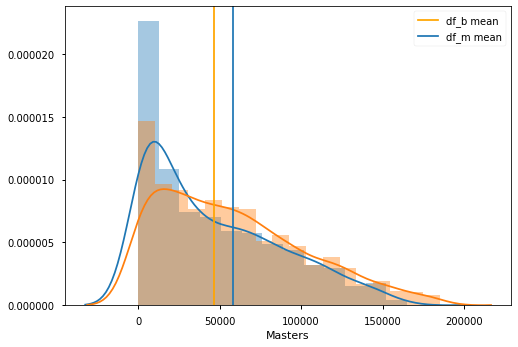

In [90]:
df_b = df_b[~find_outliers_IQR(df_b)]
df_m = df_m[~find_outliers_IQR(df_m)]        
fig, ax = plt.subplots()
sns.distplot(df_b,ax=ax)
sns.distplot(df_m,ax=ax)#[~find_outliers_IQR(df_m)])
ax.axvline(df_b.mean(),label='df_b mean',color='orange')
ax.axvline(df_m.mean(),label='df_m mean')
ax.legend()

In [93]:
import scipy.stats as stats

In [94]:
stats

<module 'scipy.stats' from '//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/__init__.py'>

In [95]:
(stat,p) = stats.normaltest(df_b)
print(stat,p)
stat,p = stats.normaltest(df_m)
print(stat,p)

96.51437400487188 1.1019705105531155e-21
132.97577706588018 1.3325296975310732e-29


In [96]:
stats.levene(df_b,df_m)

LeveneResult(statistic=5.58389611793326, pvalue=0.018190316121296204)

In [131]:
def test_assumptions(**kwargs):
    import scipy.stats as stats
    res= [['Test','Group','Stat','p','p<.05']]
    
    all_data = []
    for k,v in kwargs.items():
        try:
            all_data.append(v)
            stat,p =stats.normaltest(v)
            res.append(['Normality',k,stat,p,p<.05])
        except:
            res.append(['Normality',k,'err','err','err'])
        
    stat,p = stats.levene(*all_data)
    res.append(['Equal Variance','All',stat,p,p<.05]) 
    
    res=pd.DataFrame(res[1:],columns=res[0]).round(3)
    
    return res

In [132]:
test_assumptions(bachelors=df_b, masters=df_m)

,Test,Group,Stat,p,p<.05
0,Normality,bachelors,96.514,0.000,True
1,Normality,masters,132.976,0.000,True
2,Equal Variance,All,5.584,0.018,True


In [133]:
stat, p = stats.mannwhitneyu(df_b,df_m)
print(np.round(p,3))
p

0.0


7.889525173445223e-13

In [134]:

def Cohen_d(group1, group2, correction = False):
    """Compute Cohen's d
    d = (group1.mean()-group2.mean())/pool_variance.
    pooled_variance= (n1 * var1 + n2 * var2) / (n1 + n2)

    Args:
        group1 (Series or NumPy array): group 1 for calculating d
        group2 (Series or NumPy array): group 2 for calculating d
        correction (bool): Apply equation correction if N<50. Default is False. 
            - Url with small ncorrection equation: 
                - https://www.statisticshowto.datasciencecentral.com/cohens-d/ 
    Returns:
        d (float): calculated d value
         
    INTERPRETATION OF COHEN's D: 
    > Small effect = 0.2
    > Medium Effect = 0.5
    > Large Effect = 0.8
    
    """
    import scipy.stats as stats
    import scipy   
    import numpy as np
    N = len(group1)+len(group2)
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    ## Apply correction if needed
    if (N < 50) & (correction==True):
        d=d * ((N-3)/(N-2.25))*np.sqrt((N-2)/N)
    
    return d

In [135]:
d = Cohen_d(df_b,df_m)
d

-0.2687841770911681

In [136]:
# idx_outs_b= find_outliers_Z(df_b)
# idx_outs_m= find_outliers_Z(df_m)
# sns.distplot(df_b[~idx_outs_b])
# sns.distplot(df_m[~idx_outs_m])

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [137]:
#Your code here

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

- Q: Does level of education impact salary?
- Metric: AdjustedEducation

- $H_0$: There is no difference between education levels in compensation. 

- $H_A$: People with a higher degree have a higher adjusted compensation.

In [138]:
df = df.dropna(subset=['FormalEducation','AdjustedCompensation'])
df['FormalEducation'].value_counts()

Master's degree                                                      1990
Bachelor's degree                                                    1107
Doctoral degree                                                       967
Professional degree                                                   130
Some college/university study without earning a bachelor's degree     111
I did not complete any formal education past high school               30
I prefer not to answer                                                  7
Name: FormalEducation, dtype: int64

In [139]:
#Your code here
data = {}
for ed in df['FormalEducation'].unique():
    ed_name = ed.replace('/','').replace("'",'').replace(' ','_')
    data[ed_name] = df.groupby('FormalEducation').get_group(ed)['AdjustedCompensation'].rename(ed_name)
    
data.keys()

dict_keys(['Masters_degree', 'Bachelors_degree', 'Doctoral_degree', 'Some_collegeuniversity_study_without_earning_a_bachelors_degree', 'I_did_not_complete_any_formal_education_past_high_school', 'Professional_degree', 'I_prefer_not_to_answer'])

In [140]:
data_clean = {}
for grp,values in data.items():
    
    data_clean[grp] = values[~find_outliers_IQR(values)]
data_clean.keys()


dict_keys(['Masters_degree', 'Bachelors_degree', 'Doctoral_degree', 'Some_collegeuniversity_study_without_earning_a_bachelors_degree', 'I_did_not_complete_any_formal_education_past_high_school', 'Professional_degree', 'I_prefer_not_to_answer'])

In [141]:
new_keys = [key.replace('/','').replace("'",'').replace(' ','_') for key in data_clean.keys() ]
new_keys

['Masters_degree',
 'Bachelors_degree',
 'Doctoral_degree',
 'Some_collegeuniversity_study_without_earning_a_bachelors_degree',
 'I_did_not_complete_any_formal_education_past_high_school',
 'Professional_degree',
 'I_prefer_not_to_answer']

In [142]:
test_assumptions(**data_clean)

,Test,Group,Stat,p,p<.05
0,Normality,Masters_degree,137.281,1.54798e-30,True
1,Normality,Bachelors_degree,100.565,1.45391e-22,True
2,Normality,Doctoral_degree,54.1706,1.72584e-12,True
3,Normality,Some_collegeuniversity_study_without_earning_a_bachelors_degree,12.2874,0.00214692,True
4,Normality,I_did_not_complete_any_formal_education_past_high_school,4.3202,0.115314,False
5,Normality,Professional_degree,13.7059,0.00105632,True
6,Normality,I_prefer_not_to_answer,err,err,err
7,Equal Variance,All,11.3403,1.31258e-12,True


In [147]:
# data_clean_anova = [val for val in data_cela]
test_data = list(data_clean.values())
stat,p = stats.f_oneway(*test_data)
p

7.696098535016285e-50

In [149]:
# sns.barplot(data=df,x='FormalEducation',y='AdjustedCompensation')

In [159]:
df = df[~find_outliers_IQR(df['AdjustedCompensation'])]
df

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802310,64184.800
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,20882.400
11,Male,India,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015620,1483.900
14,Male,Taiwan,26.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033304,36634.400
21,Male,United States,25.0,Employed part-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,20000.000
22,Male,United States,33.0,Employed full-time,NaN,NaN,Yes,NaN,Scientist/Researcher,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,100000.000
23,Male,Czech Republic,21.0,Employed part-time,NaN,NaN,Yes,NaN,Other,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045820,916.400
25,Male,Russia,22.0,Employed full-time,NaN,NaN,Yes,NaN,Data Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,10858.848
27,Male,Colombia,34.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000342,53352.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


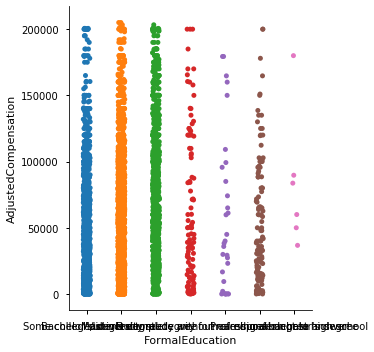

In [160]:
sns.catplot(data=df,x='FormalEducation',y='AdjustedCompensation')

In [161]:
import statsmodels.api as sms

tukey = sms.stats.multicomp.pairwise_tukeyhsd(df['AdjustedCompensation'],df['FormalEducation'])
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Bachelor's degree,Doctoral degree,27382.1757,0.001,20995.921,33768.4305,True
Bachelor's degree,I did not complete any formal education past high school,8905.2727,0.9,-17506.7297,35317.2751,False
Bachelor's degree,I prefer not to answer,32939.9671,0.6216,-25481.7193,91361.6535,False
Bachelor's degree,Master's degree,9512.4887,0.001,4110.2045,14914.7728,True
Bachelor's degree,Professional degree,3205.1516,0.9,-10177.0428,16587.3459,False
Bachelor's degree,Some college/university study without earning a bachelor's degree,9291.9359,0.4739,-5045.6119,23629.4837,False
Doctoral degree,I did not complete any formal education past high school,-18476.903,0.3793,-44952.1776,7998.3716,False
Doctoral degree,I prefer not to answer,5557.7914,0.9,-52892.5272,64008.1099,False
Doctoral degree,Master's degree,-17869.687,0.001,-23573.2798,-12166.0943,True
Doctoral degree,Professional degree,-24177.0242,0.001,-37683.6677,-10670.3806,True


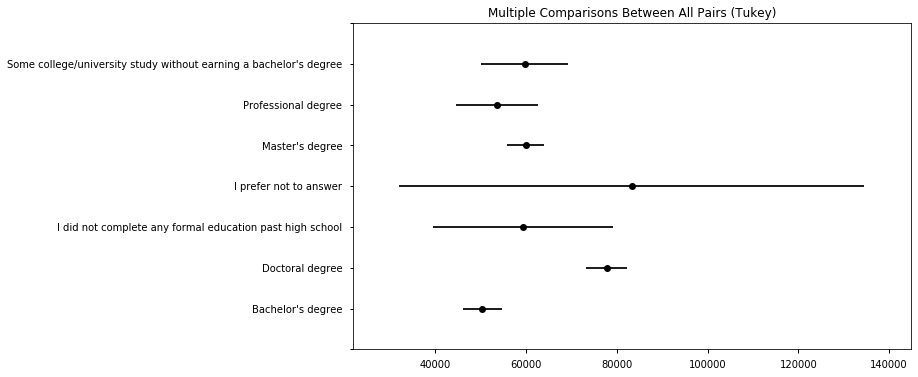

In [163]:
tukey.plot_simultaneous();

In [153]:
# formula = 'AdjustedCompensation ~ C(FormalEducation) +'
# lm = ols(formula, df).fit()
# table = sm.stats.anova_lm(lm, typ=2)
# print(table)

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!